In [ ]:
!pip install nltk
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
user = pd.read_csv('/content/gdrive/MyDrive/data user/dataset_user.csv')

user

,Postingan,Kategori Pekerjaan
0,Kami sedang mengalami masalah dengan beberapa ...,Servis Mesin Cuci
1,Perusahaan kami mencari teknisi komputer yang ...,Service Keamanan
2,Perusahaan kami mencari teknisi komputer yang ...,Service Sistem
3,Sound system kami telah mengalami kerusakan da...,Servis Soundsystem
4,Kami sedang mencari teknisi komputer berpengal...,Service Perangkat keras
...,...,...
745,Kami mencari tukang cat motif kreatif yang dap...,Tukang Cat
746,Lowongan teknisi komputer terbuka untuk indivi...,Service Perangkat lunak
747,Apakah Anda memiliki pengalaman dalam mengelol...,Service Data
748,Dicari tukang kayu berbakat yang memiliki keah...,Tukang Kayu


In [ ]:
#Counting the rows for each label
user['Kategori Pekerjaan'].value_counts()

Servis Mesin Cuci          50
Service Keamanan           50
Service Sistem             50
Servis Soundsystem         50
Service Perangkat keras    50
Tukang Kayu                50
Servis Televisi            50
Tukang Las                 50
Servis AC                  50
Tukang Batu                50
Tukang Semen               50
Servis Kulkas              50
Service Data               50
Service Perangkat lunak    50
Tukang Cat                 50
Name: Kategori Pekerjaan, dtype: int64

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
oov_token = "<OOV>"
trunc_type = 'post'
training_size = .9

In [ ]:
# Menghilangkan tanda baca

def remove_punc(sentences):
  translator = str.maketrans('', '', string.punctuation)
  no_punct = sentences.translate(translator)

  return no_punct

In [ ]:
# Menghilangkan stopwords

def remove_stopwords(sentences):
  sentences = sentences.lower()
  sentences = remove_punc(sentences)

  factory = StopWordRemoverFactory()
  stopwords = factory.get_stop_words()

  words = sentences.split()
  words_result = [word for word in words if word not in stopwords]

  sentences = ' '.join(words_result)

  return sentences

In [ ]:
def parse_data(filename):

  sentences = []
  labels = []

  with open (filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter =',')

    next(reader, None)

    for row in reader:
      labels.append(remove_stopwords(row[1]))
      sentences.append(remove_stopwords(row[0]))

    return sentences, labels

In [ ]:
import string

sentences, labels = parse_data("/content/gdrive/MyDrive/data user/dataset_user.csv")
print("ORIGINAL DATASET:\n")
print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}\n\n")

ORIGINAL DATASET:

There are 750 sentences in the dataset.

First sentence has 22 words (after removing stopwords).

There are 750 labels in the dataset.

The first 5 labels are ['servis mesin cuci', 'service keamanan', 'service sistem', 'servis soundsystem', 'service perangkat keras']




In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(sentences)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type, padding = 'post')

In [ ]:
labels = pd.get_dummies(user["Kategori Pekerjaan"]).values
print('Shape of label tensor:',labels.shape)

cek_label = pd.get_dummies(user["Kategori Pekerjaan"])
encoding_to_class = {tuple(encoding): label for encoding, label in zip(cek_label.values, user["Kategori Pekerjaan"])}
print(encoding_to_class)
#print(cek_label.head())

Shape of label tensor: (750, 15)
{(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 'Servis Mesin Cuci', (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Service Keamanan', (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Service Sistem', (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 'Servis Soundsystem', (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Service Perangkat keras', (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 'Tukang Kayu', (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 'Servis Televisi', (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 'Tukang Las', (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Servis AC', (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 'Tukang Batu', (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 'Tukang Semen', (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 'Servis Kulkas', (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Service Data', (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 'Service Perangkat lunak', (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0): '

In [ ]:
random_seed = 42

train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    padded, labels, test_size = 1-training_size, random_state = random_seed
)

In [ ]:
jml_train = len(train_sentences)

print(jml_train)

675


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(15, activation = 'softmax')
    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 dropout_1 (Dropout)         (None, 100, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            5184      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 166159 (649.06 KB)
Trainable params: 166159 (649.06 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_sentences,
    train_labels,
    validation_data = (test_sentences, test_labels),
    epochs = 400,
    verbose = 2
)

Epoch 1/400
22/22 - 2s - loss: 2.7107 - accuracy: 0.0548 - val_loss: 2.7088 - val_accuracy: 0.0800 - 2s/epoch - 76ms/step
Epoch 2/400
22/22 - 0s - loss: 2.7096 - accuracy: 0.0770 - val_loss: 2.7080 - val_accuracy: 0.0800 - 301ms/epoch - 14ms/step
Epoch 3/400
22/22 - 0s - loss: 2.7085 - accuracy: 0.0681 - val_loss: 2.7073 - val_accuracy: 0.0800 - 300ms/epoch - 14ms/step
Epoch 4/400
22/22 - 0s - loss: 2.7071 - accuracy: 0.0637 - val_loss: 2.7065 - val_accuracy: 0.0800 - 280ms/epoch - 13ms/step
Epoch 5/400
22/22 - 0s - loss: 2.7064 - accuracy: 0.0696 - val_loss: 2.7055 - val_accuracy: 0.0800 - 266ms/epoch - 12ms/step
Epoch 6/400
22/22 - 0s - loss: 2.7057 - accuracy: 0.0741 - val_loss: 2.7047 - val_accuracy: 0.0800 - 336ms/epoch - 15ms/step
Epoch 7/400
22/22 - 0s - loss: 2.7059 - accuracy: 0.0696 - val_loss: 2.7039 - val_accuracy: 0.0800 - 277ms/epoch - 13ms/step
Epoch 8/400
22/22 - 0s - loss: 2.7036 - accuracy: 0.0726 - val_loss: 2.7030 - val_accuracy: 0.0800 - 306ms/epoch - 14ms/step
Epo

In [ ]:
rounded_labels = np.argmax(test_labels, axis=1)

In [ ]:
predictions = model.predict(test_sentences)
predicted_labels = np.argmax(predictions, axis=1)

3/3 [==============================] - 0s 4ms/step


In [ ]:
unique_classes = np.unique(rounded_labels)
print("Unique Predicted Classes:", unique_classes)
print("Number of Unique Predicted Classes:", len(unique_classes))

unique_class = np.unique(predicted_labels)
print("Unique Predicted Classes:", unique_class)
print("Number of Unique Predicted Classes:", len(unique_class))

Unique Predicted Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Number of Unique Predicted Classes: 15
Unique Predicted Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Number of Unique Predicted Classes: 15


In [ ]:
model.save("model_user.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


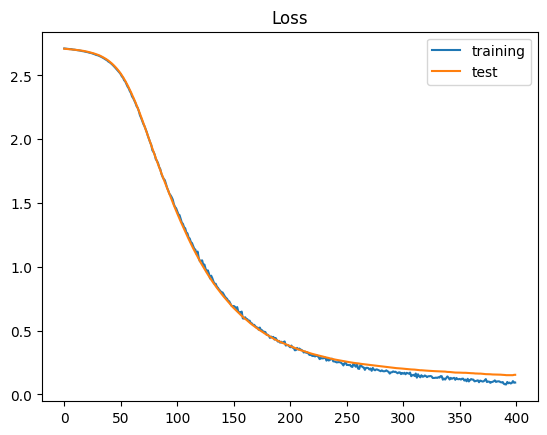

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

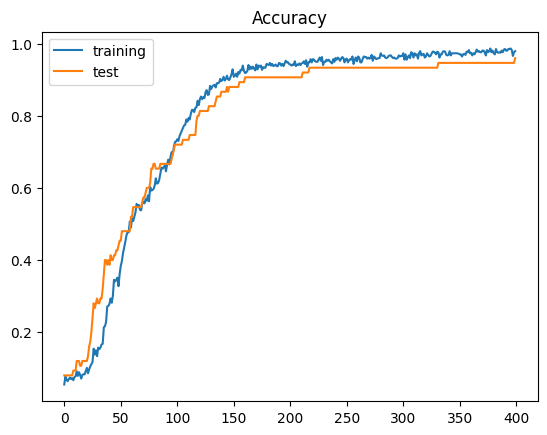

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
pengalaman = 'Kami mencari seorang teknisi soundsystem untuk memperbaiki kerusakan soundsystem oleh air'

pengalaman = pengalaman.lower()

translator = str.maketrans('', '', string.punctuation)
pengalaman = pengalaman.translate(translator)

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

kata = pengalaman.split()
hasil_kata = [word for word in kata if word not in stopwords]

pengalaman = ' '.join(hasil_kata)

pengalaman = [f'{pengalaman}']

sequence = tokenizer.texts_to_sequences(pengalaman)
padded_sequence = pad_sequences(sequence, maxlen=max_length)
predict = model.predict(padded_sequence)
predict_label = labels[np.argmax(predict)]
labels = ['service data', 'service keamanan', 'service perangkat keras', 'service perangkat lunak', 'service sistem', 'service ac', 'service kulkas', 'service mesin cuci', 'service soundsystem', 'service televisi', 'tukang batu', 'tukang cat', 'tukang kayu', 'tukang las', 'tukang semen']

print(predict)
print(predict_label)

1/1 [==============================] - 0s 19ms/step
[[9.4231080e-05 4.2505574e-04 2.2503480e-02 3.4628047e-05 6.0760003e-04
  1.1555658e-02 1.2516885e-01 2.1709342e-02 7.6683021e-01 3.8916964e-02
  5.4029521e-04 1.0732186e-02 1.2181843e-04 1.2736583e-04 6.3238124e-04]]
service soundsystem


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(rounded_labels, predicted_labels)

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
from sklearn.utils.multiclass import unique_labels
true_labels = unique_labels(rounded_labels)
pred_labels = unique_labels(predicted_labels)

In [ ]:
def plot(y_true, y_pred):
  labels = true_labels
  column = [f'Predicted{label}' for label in labels]
  indicies = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                       columns=column, index=indicies)

  return table

In [ ]:
plot(rounded_labels, predicted_labels)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted11,Predicted12,Predicted13,Predicted14
Actual0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual1,0,6,0,2,0,0,0,0,0,0,0,0,0,0,0
Actual2,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
Actual3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0
Actual4,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
Actual5,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0
Actual6,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
Actual7,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
Actual8,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
Actual9,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
